In [1]:
pip install networkx


Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
class DiGraph:
    def __init__(self):
        self.graph={} #g=graph
    def add_node(self,node):
        if node in self.graph:
            raise ValueError("SOURCE NODE ALREADY IN GRAPH")
        self.graph[node]=[]
    def add_edge(self,source,destination):
        if source not in self.graph or destination not in self.graph:#sanity check
            raise Exception("NODES DOESNOT EXIST")
        if destination not in self.graph[source]:
            self.graph[source].append(destination)
  

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph):
    G = nx.DiGraph()

    # Add nodes to the graph
    for node in graph.graph.keys():
        G.add_node(node)

    # Add edges to the graph
    for source, destinations in graph.graph.items():
        for destination in destinations:
            G.add_edge(source, destination)

    # Create a layout for the graph
    pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray', arrows=True)

    # Show the graph
    plt.show()
DiGraph.draw_graph=visualize_graph

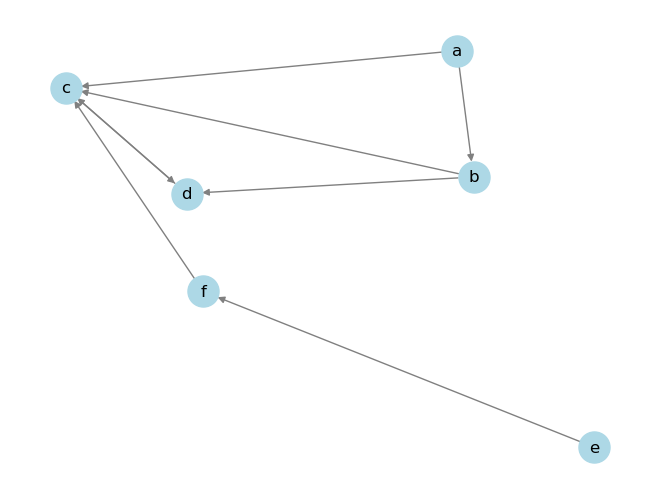

In [13]:
g=DiGraph()
g.add_node('a')
g.add_node('b')
g.add_node('c')
g.add_node('d')
g.add_node('e')
g.add_node('f')
g.add_edge('a','b')
g.add_edge('a','c')
g.add_edge('b','c')
g.add_edge('b','d')
g.add_edge('c','d')
g.add_edge('d','c')
g.add_edge('f','c')

g.add_edge('e','f')
g.draw_graph()

In [6]:
import pprint

In [7]:
print(g.graph)  #Abstraction Police :  Don't freak out we are just looking
pprint.pprint(g.graph) #pretty printing!

{'a': ['b', 'c'], 'b': ['c', 'd'], 'c': ['d'], 'd': ['c'], 'e': ['f'], 'f': ['c']}
{'a': ['b', 'c'],
 'b': ['c', 'd'],
 'c': ['d'],
 'd': ['c'],
 'e': ['f'],
 'f': ['c']}


In [14]:
def traverse_graph(self,start):
    """Traverse graph starting from given starting node"""
    q=[ start ]
    visited=[] #list of elements already visited
    
    while q:
        current=q.pop(0)#deque
        
        #if we have already visited node dont traverse again
        if current in visited:
            continue
        print(current)
        
        #adding to visited element list
        visited.append(current)
        
        next_nodes=self.graph[current]
        #adding all connected node to current node
        for n in next_nodes:
            q.append(n)#enque
    
DiGraph.traverse_graph=traverse_graph    

In [15]:
g.traverse_graph('a')

a
b
c
d


In [16]:
def find_path(self,start,end,path=[]):
    """FIND PATH(NOT NECCESARILY SHORTEST ) FROM START TO END"""
    if start not in self.graph:
        raise ValueError("STARTING POINT NOT IN GRAPH")
    #print(start,' , ',end)
    path=path+[start]
    if start==end:
        return path
    for node in self.graph[start]:
        if node not in path:
            new_path=self.find_path(node,end,path)
            if new_path:
                return new_path
    return None
DiGraph.find_path=find_path

In [11]:
print(g.find_path('a','f'))

None
